In [5]:
from analyse_helper import load_ocelot_data
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

BASE_DIR = "../2022-11-24-data/"

## Look into 2d-10d benchmark runs of BO and Simplex

In [6]:
fname_dict = {}
fname_dict['2'] = ['benchmark_ucb_2022_11_24-08_56_30.json', '2022-11-24 09-04-27.json']
fname_dict['4'] = ['benchmark_ucb_2022_11_24-09_11_00.json', '2022-11-24 09-19-20.json']
fname_dict['6'] = ['benchmark_ucb_2022_11_24-09_21_33.json', '2022-11-24 09-34-23.json']
fname_dict['8'] = ['benchmark_ucb_2022_11_24-09_44_46.json', '2022-11-24 10-01-07.json']
fname_dict['10'] = ['benchmark_ucb_2022_11_24-10_13_49.json', '2022-11-24 10-31-55.json']

In [9]:
benchmark_data = []
for run in ["2","4","6","8","10"]:
    with open(f"{BASE_DIR}/bo/{fname_dict[run][0]}") as f:
              bodata = json.load(f)
    benchmark_data.append({
           "dim": int(run),
        "simplex": load_ocelot_data(f"{BASE_DIR}/simplex/{fname_dict[run][1]}"), 
        "bo":  bodata,
    })

[2880 2500 2845 3120 3011]
[2864 2900 2852 2944 3049]


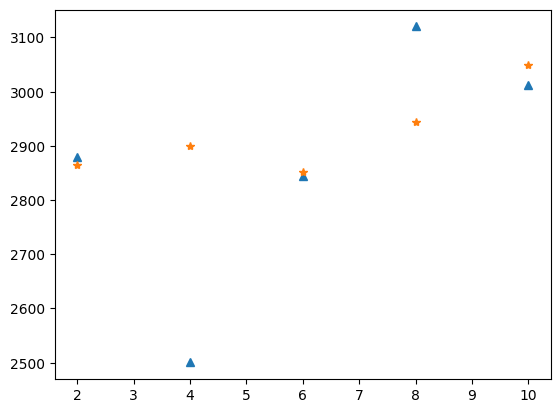

In [31]:
dims = [2,4,6,8,10]
bo_ymax = [np.max(data["bo"]["Y"]) for data in benchmark_data]
simplex_ymax = [np.max(data["simplex"]["Y"]) for data in benchmark_data]
print(np.array(bo_ymax, dtype=int))
print(np.array(simplex_ymax, dtype=int))
plt.plot(dims, bo_ymax, "^")
plt.plot(dims, simplex_ymax, "*")

[2880.2485107421876, 2471.4026611328127, 2696.728076171875, 3060.827294921875, 3011.928328450521]
[2684.663134765625, 2872.3500813802084, 2609.718896484375, 2641.253458658854, 3014.4396728515626]


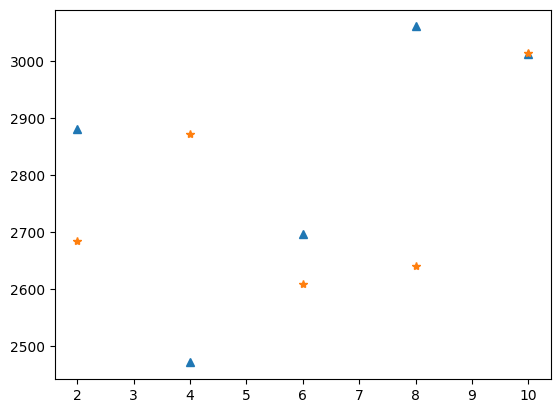

In [13]:
dims = [2,4,6,8,10]
bo_ylast = [data["bo"]["Y"][-1] for data in benchmark_data]
simplex_ylast = [data["simplex"]["Y"][-1] for data in benchmark_data]
print(bo_ylast)
print(simplex_ylast)
plt.plot(dims, bo_ylast, "^")
plt.plot(dims, simplex_ylast, "*")

In [29]:
def find_convergence_step(y, threshold:float=126):
    y = np.array(y)
    conv_step = 0
    diff_y = np.abs(y - y[-1])
    for i in range(len(y)):
        if (diff_y[i:] < threshold).all():
            conv_step = i
            return conv_step

[ 22  27  34 102  84]
[ 36  28  45 105  78]


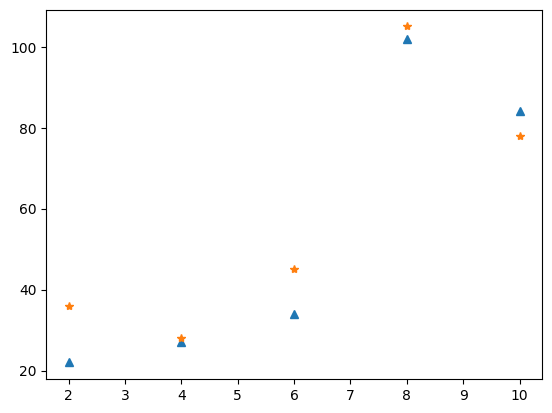

In [30]:
dims = [2,4,6,8,10]
threshold = 226 # mu + 1 sigma
bo_convstep = np.array([find_convergence_step(data["bo"]["Y"], threshold) for data in benchmark_data])
simplex_convstep = np.array([find_convergence_step(data["simplex"]["Y"], threshold) for data in benchmark_data])
print(bo_convstep)
print(simplex_convstep)
plt.plot(dims, bo_convstep, "^")
plt.plot(dims, simplex_convstep, "*")